## Step 1 - Import Libraries & Load Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("data/churn.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Step 2 - Clean & Preprocess Data

In [3]:
df.duplicated().sum()     # Checking duplicate rows 

0

There are no duplicate rows in  the dataset.

In [4]:
df.isna().sum()     # Total null values in each columns

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There are no null values in the dataset.

In [5]:
df[df["Age"] < 0].shape[0]

0

Hence, there are no rows which have negative values of "age" column.

## Step 3 - EDA

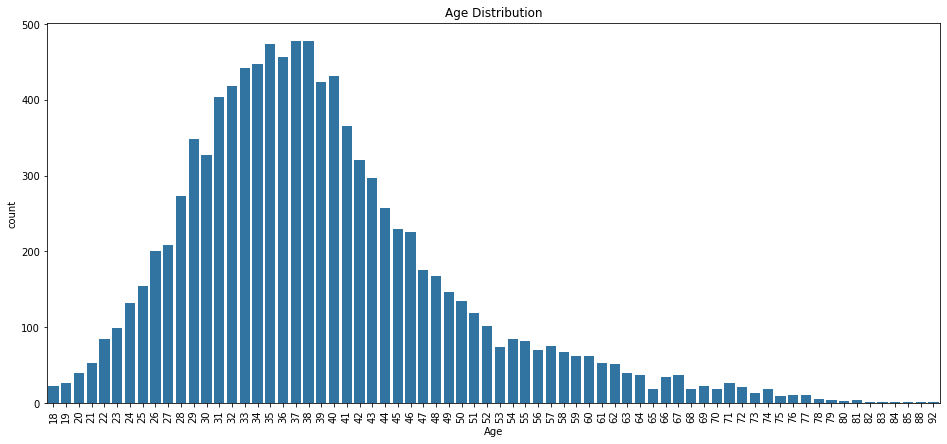

In [6]:
# Age distribution
plt.figure(figsize=(16, 7))
sns.countplot(data=df, x='Age', order=sorted(df['Age'].unique()))
plt.xticks(rotation=90)
plt.title("Age Distribution")
plt.show()

**Insights** :-

- Most customers fall roughly between the **30–50** age group so churn analysis and retention strategies should primarily focus on this age group, as it represents the largest business impact.
- There are significantly fewer customers below **20** years and above **65** years.
- The wide spread and clear clustering of ages make **Age** a strong feature for churn prediction models and customer segmentation.

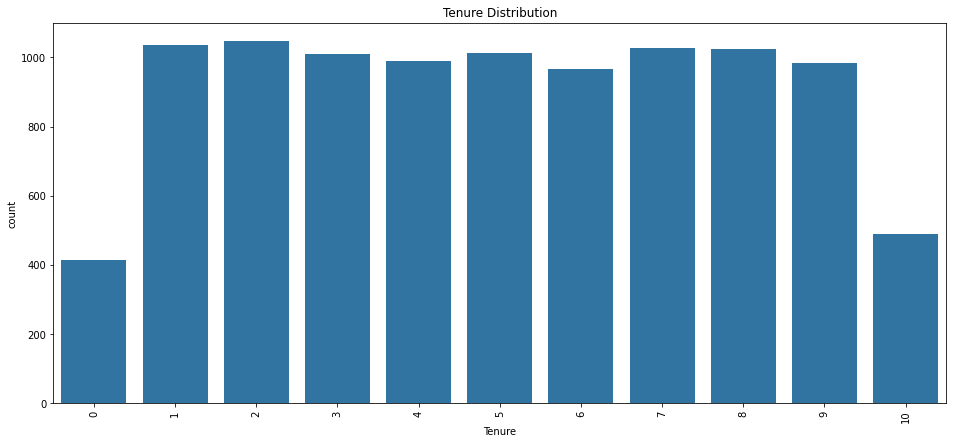

In [7]:
# Tenure distribution
plt.figure(figsize=(16, 7))
sns.countplot(data=df, x='Tenure', order=sorted(df['Tenure'].unique()))
plt.xticks(rotation=90)
plt.title("Tenure Distribution")
plt.show()

**Insights** :-
- There is a relatively higher count of customers with **0–3** years of tenure, suggesting strong recent customer acquisition but also highlighting a potential early-stage churn risk.

- Customer count tends to **decrease** with higher tenure values, which is typical as:
    - Not all customers stay long-term
    - Some churn naturally occurs over time
    
- Customers with **7–10** years of tenure are fewer but represent:
    - Loyal customers
    - Likely higher lifetime value (LTV)
    - Lower churn probability
    
- Customers in their **first** few years are more likely to churn due to:
    - Onboarding issues
    - Unmet expectations
    - Competitive offers from other banks

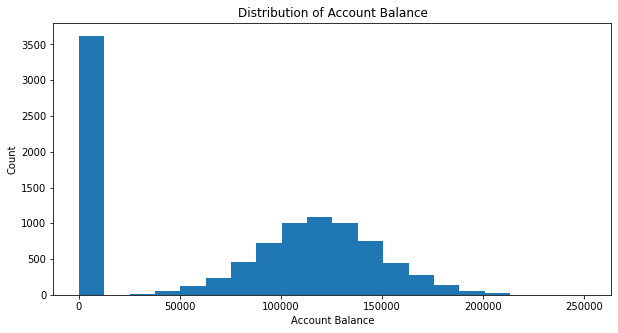

In [8]:
# Account balance patterns
plt.figure(figsize=(10, 5))
plt.hist(df['Balance'], bins=20)    # Histogram distribution for account balance
plt.title("Distribution of Account Balance")
plt.xlabel("Account Balance")
plt.ylabel("Count")
plt.show()

**Insights**  :-

- A large portion of customers maintain **zero** balance, indicating inactive or low-engagement accounts.
- Balance distribution is **right-skewed** with a concentration between **80k–140k**.

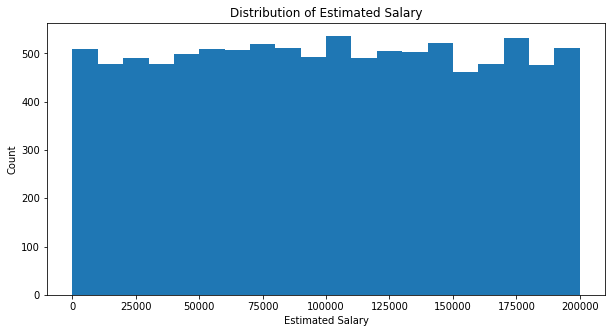

In [9]:
# Estimated salary pattern
plt.figure(figsize=(10, 5))
plt.hist(df['EstimatedSalary'].values, bins=20)    # Histogram distribution for estimated salary
plt.title("Distribution of Estimated Salary")
plt.xlabel("Estimated Salary")
plt.ylabel("Count")
plt.show()

**Insights** :-

- **Salary** is almost uniformly distributed

- No strong salary concentration

- Indicates salary alone may not drive churn

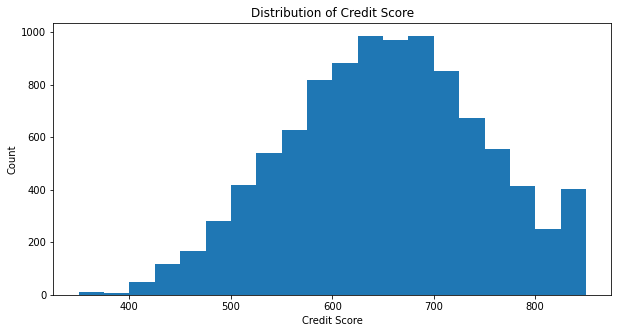

In [10]:
# Credit score pattern
plt.figure(figsize=(10, 5))
plt.hist(df['CreditScore'].to_numpy(), bins=20)   # Histogram distribution for credit score
plt.title("Distribution of Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Count")
plt.show()

**Insights** :-

- Most customers fall in the **600–750** range

- Few customers have very low **(<500)** or very high **(>800)** scores

- Indicates a largely medium-to-good credit quality customer base

## Step 4 — Churn Relationship Analysis

### Overview of Credit Score vs Churn

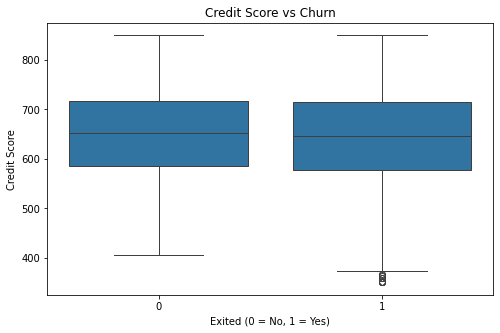

In [11]:
# Interpretation through boxplot between "Credit score" v/s "Churn" 
plt.figure(figsize=(8, 5))
sns.boxplot(x='Exited', y='CreditScore', data=df)
plt.title("Credit Score vs Churn")
plt.xlabel("Exited (0 = No, 1 = Yes)")
plt.ylabel("Credit Score")
plt.show()

**Insights**  :-

- Churned customers show:
  - Slightly lower **median** credit score
  - More low-score **outliers**
- Distribution overlap exists → moderate predictive power

### Overview of Balance vs Churn

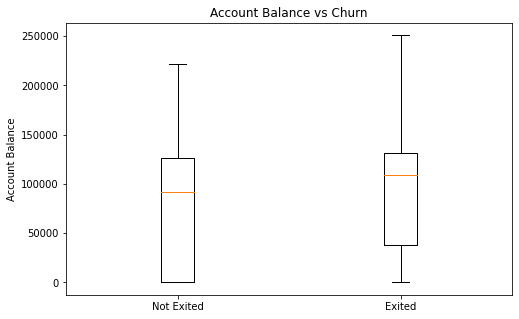

In [12]:
# Interpretation through boxplot between "Balance" v/s "Churn" 
plt.figure(figsize=(8, 5))
plt.boxplot(
    [df[df['Exited'] == 0]['Balance'],
     df[df['Exited'] == 1]['Balance']],
    labels=['Not Exited', 'Exited']
)

plt.title("Account Balance vs Churn")
plt.ylabel("Account Balance")
plt.show()

**Insights** :-

- Nearly identical medians.
- Overlapping **IQRs**.
- **Salary** is not a strong churn indicator.

### Overview of Age vs Churn

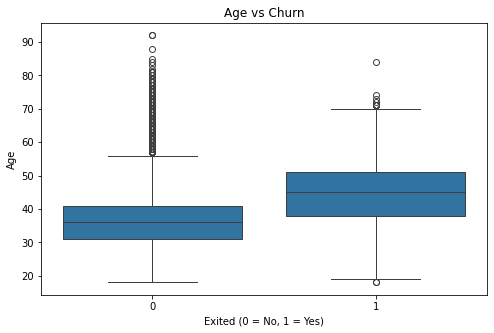

In [13]:
# Interpretation through boxplot between "Age" v/s "Churn" 
plt.figure(figsize=(8, 5))
sns.boxplot(x='Exited', y='Age', data=df)
plt.title("Age vs Churn")
plt.xlabel("Exited (0 = No, 1 = Yes)")
plt.ylabel("Age")
plt.show()

**Insights**  :-

- Median age of churned customers is much **higher**.
- Younger customers tend to stay **longer**.
- Clear separation → high predictive value.

## Step 5 - Correlation Matrix

In [14]:
corr = df.select_dtypes(include='number').corr()
corr

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


<AxesSubplot:>

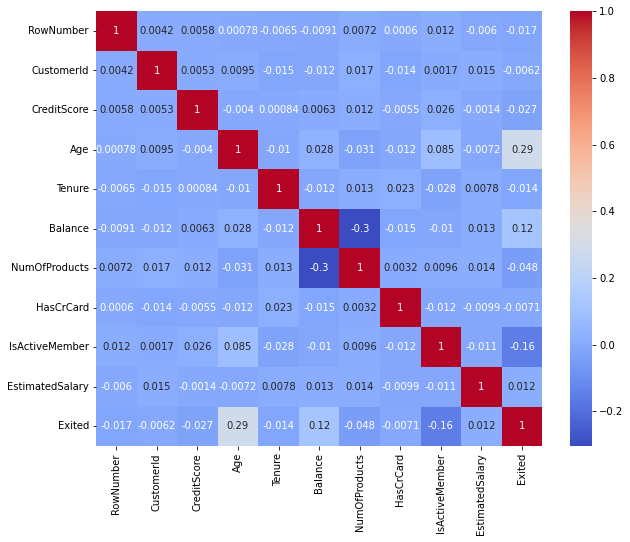

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")

**Insights** :-

- **Age** → strong positive correlation with churn

- **IsActiveMember** → strong negative correlation

- **Balance** → moderate positive correlation

- **CreditScore** & **EstimatedSalary** → weak correlation

- **NumOfProducts** → mixed / non-linear relationship